In [ ]:
 # Подгрузим пакеты
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as st
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns

# Покемоны и AB-тестирование
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [ ]:
pokemon = pd.read_csv('pokemon.csv', error_bad_lines=False)  # Откроем датасет
pokemon


# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


# Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [ ]:
# исключаем строки, покемоны которых относятся к обоим классам

pok = pokemon[~(((pokemon['Class 1']=='Rock') & (pokemon['Class 2']=='Grass')) |
              ((pokemon['Class 1']=='Grass') & (pokemon['Class 2']=='Rock')))]
pok

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


In [ ]:
# отдельные датафреймы для покемонов Rock и Grass


pok_rock = pok[(pok['Class 1']== 'Rock') | (pok['Class 2']== 'Rock')]   # только покемоны класса 1 и 2 Rock
print(len(pok_rock))
pok_grass = pok[(pok['Class 1']== 'Grass') | (pok['Class 2']== 'Grass')] # # только покемоны класса 1 и 2 Grass
print(len(pok_grass))

56
93


In [ ]:
print(f"Среднее значение обычной атаки в классе Rock: {pok_rock['Attack'].mean(): .2f}")
print(f"Среднее значение обычной атаки в классе Grass: {pok_grass['Attack'].mean(): .2f}")

Среднее значение обычной атаки в классе Rock:  91.79
Среднее значение обычной атаки в классе Grass:  73.73


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


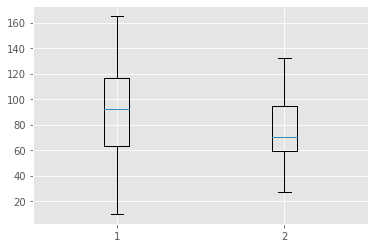

In [ ]:
plt.boxplot([pok_rock['Attack'],pok_grass['Attack']]);

*Средние значения показывают, что более высокая обычная атака у класса Rock.*
*Это отличается от предположений профессора Оук.*

In [ ]:
# проверим данные на различие дисперсий

stat, p = st.levene(pok_rock['Attack'], pok_grass['Attack'])
print(f"Статистика = {stat:.5f}, p = {p:.7f}")

if p <0.05:
  print("Отклоняем нулевую гипотезу >> Дисперсии в группах раличаются")
else:
  print("Не отклоняем нулевую гипотезу >> Дисперсии в группах одинаковые")

Статистика = 8.93747, p = 0.0032760
Отклоняем нулевую гипотезу >> Дисперсии в группах раличаются


In [ ]:
# тест Стьюдента с поправкой на различие дисперсий
# Н0 - средние занчения статистически не отличаются, обычная атака одинакова для классов Rock и Grass
# Н1 - средние значения различаются, обычная атака у одного класса сильнее другого класса

stat, p = st.ttest_ind(pok_rock['Attack'], pok_grass['Attack'], equal_var = False)
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=3.417, p=0.0009640547
Отклоняем нулевую гипотезу, средние, вероятно, различаются


**Вывод.**

Тест Стьюдента отклоняет нулевую гипотезу об одинаковых средних, то есть с вероятностью 95 % сила обычной атаки между классами Rock и Grass отличается.
Поэтому можем опровергнуть предположения профессора Оук - покемоны в классе grass имеют более сильную обычную атаку, чем у покемонов в классе rock.

Более сильную обычную атаку имеют покемоны класса Rock.

---



<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`.
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
# исключаем из данных строки, покемоны которых относятся к обоим классам Water и Normal

pok1 = pokemon[~(((pokemon['Class 1']=='Water') & (pokemon['Class 2']=='Normal')) |
              ((pokemon['Class 1']=='Normal') & (pokemon['Class 2']=='Water')))]
pok1

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


In [ ]:
# датафреймы для покемонов класса Water и Normal

pok_water = pok[(pok['Class 1']== 'Water') | (pok['Class 2']== 'Water')]        #покемоны класса Water
print(len(pok_water))
pok_normal = pok[(pok['Class 1']== 'Normal') | (pok['Class 2']== 'Normal')]     #покемоны класса Normal
print(len(pok_normal))

126
102


In [ ]:
print(f"Среднее значение скорости в классе Water: {pok_water['Speed'].mean(): .2f}")
print(f"Среднее значение скорости в классе Normal: {pok_normal['Speed'].mean(): .2f}")

Среднее значение скорости в классе Water:  64.98
Среднее значение скорости в классе Normal:  72.25


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


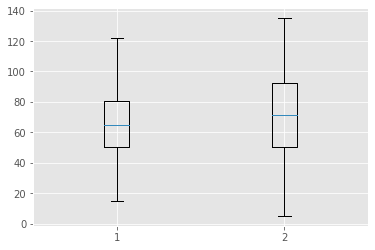

In [ ]:
plt.boxplot([pok_water['Speed'],pok_normal['Speed']]);

*Среднее значения скорости показывают, что покемоны класса Normal быстрее класса Water, что противоречит предположениям профессора Оук.*

In [ ]:
# проверим данные на различие дисперсий

stat, p = st.levene(pok_water['Speed'],pok_normal['Speed'])
print(f"Статистика = {stat:.5f}, p = {p:.7f}")

if p <0.05:
  print("Отклоняем нулевую гипотезу >> Дисперсии в группах раличаются")
else:
  print("Не отклоняем нулевую гипотезу >> Дисперсии в группах одинаковые")

Статистика = 7.37000, p = 0.0071440
Отклоняем нулевую гипотезу >> Дисперсии в группах раличаются


In [ ]:
# тест Стьюдента с поправкой на различие дисперсий
# Н0 - средние занчения статистически не отличаются, скорость одинакова для классов Rock и Grass
# Н1 - средние значения различаются, скорость одного класса сильнее другого класса

stat, p = st.ttest_ind(pok_water['Speed'],pok_normal['Speed'], equal_var = False)
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=-2.103, p=0.0367733783
Отклоняем нулевую гипотезу, средние, вероятно, различаются


**Вывод.**

Тест Стьюдента отклоняет гипотезу об одинаковых средних, то есть с вероятностью 95 % скорость между классами Water и Normal отличается. Поэтому на основании средних значений, можем опровергнуть предположения профессора Оук - покемоны в классе Water в среднем более быстрее, чем покемоны класс Normal.

В среднем быстрее покемоны класса Normal.

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

Будем сравнивать средние значения скорости движения покемонов:

1. покемоны, которые принимали сыворотку - Mega Beedrill, Mega Alakazam, Deoxys Normal Forme, Mega Lopunny;
2. все покемоны.


In [ ]:
# Покемоны, принимавшие сыворотку

pok_treathed = pokemon[pokemon['Name'].isin(treathed_pokemon)]
pok_treathed

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [ ]:
# покемоны, которые не принимали сыворотку

pok_other = pokemon[~(pokemon['Name'].isin(treathed_pokemon))]


In [ ]:
print(f"Средняя скорость движения всех покемонов: {pokemon['Speed'].mean(): .2f}")
print(f"Средняя скорость движения покемонов, не принимавших сыворотку: {pok_other['Speed'].mean(): .2f}")
print(f"Средняя скорость движения покемонов, принимавших сыворотку: {pok_treathed['Speed'].mean(): .2f}")

Средняя скорость движения всех покемонов:  68.28
Средняя скорость движения покемонов, не принимавших сыворотку:  67.89
Средняя скорость движения покемонов, принимавших сыворотку:  145.00


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


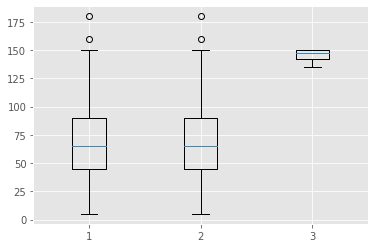

In [ ]:
plt.boxplot([pokemon['Speed'], pok_other['Speed'], pok_treathed['Speed']]);

*Среднее значение покемонов, принимавших сыворотку 145.00 и значительно отличается от среднего значения всех покемонов - 68.28, или от значения покемонов, которые не принимали сыворотку - 67.89.*

Проверим статистическую значимость этих значений.

Используем одновыборочный Т-тест, так как нужно сравнить среднюю скорость выборки с общим количеством покемонов.

In [ ]:
# Н0 - среднее значение скорости покемонов, принимавших сыворотку, не отличается от среднего всех покемонов
# Н1 - среднее значение скорости покемонов, принимавших сыворотку, отличается от среднего всех покемонов

stat, p = st.ttest_1samp(a=pok_treathed['Speed'], popmean=pokemon['Speed'].mean())
print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу, среднее значение скорости покемонов, принимавших сыворотку, вероятно, не отличается от среднего всех покемонов")
else:
    print("Отклоняем нулевую гипотезу, среднее значение скорости покемонов, принимавших сыворотку, вероятно, отличается от среднего всех покемонов")

Статистика = 21.700, p = 0.000
Отклоняем нулевую гипотезу, среднее значение скорости покемонов, принимавших сыворотку, вероятно, отличается от среднего всех покемонов


**Вывод.**

С вероятностью 95 % средняя скорость покемонов, принимавших сыворотку, отличается статистически от средней скорости всех покемонов. Следовательно, сыворотка увеличивает скорость покемонов, так как среднее значение скорости покемонов с сывороткой составляет 145.00, и в два раза выше скорости всех покемонов - 68.28.

---



<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
# рассчитаем сумму и произведение характеристик HP,Attack,Defense у легендарных покемонов

pok_legend = pokemon[pokemon['Legendary']== True]                                # датафрейм легендарных покемонов

pok_legend['Sum_charac'] = pok_legend.iloc[:,4:7].sum(axis = 1)                  # сумма характеристик
pok_legend['Multiply_charac'] = pok_legend['HP'] * pok_legend['Attack'] * pok_legend['Defense']   # произведение характеристик
pok_legend.head()

<ipython-input-98-33ecbf99fc89>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pok_legend['Sum_charac'] = pok_legend.iloc[:,4:7].sum(axis = 1)                  # сумма характеристик
<ipython-input-98-33ecbf99fc89>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pok_legend['Multiply_charac'] = pok_legend['HP'] * pok_legend['Attack'] * pok_legend['Defense']   # произведение характеристик


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Sum_charac,Multiply_charac
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,True,275,765000
157,158,Zapdos,Electric,Flying,90,90,85,125,90,100,True,265,688500
158,159,Moltres,Fire,Flying,90,100,90,125,85,90,True,280,810000
162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True,306,1049400
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True,396,2014000


In [ ]:
# сумма и произведение характеристик HP,Attack,Defense для всех покемонов

pokemon['Sum_charac'] = pokemon.iloc[:,4:7].sum(axis = 1)
pokemon['Multiply_charac'] = pokemon['HP'] * pokemon['Attack'] * pokemon['Defense']

In [ ]:
# средние значения сумм характеристик

print('Среднее значение сумм характеристик всех покемонов: ', pokemon['Sum_charac'].mean())
print('Среднее значение сумм характеристик легендарных покемонов: ', pok_legend['Sum_charac'].mean())

Среднее значение сумм характеристик всех покемонов:  222.1025
Среднее значение сумм характеристик легендарных покемонов:  309.0769230769231


*Среднее значение сумм характеристик у легендарных покемонов 309.08, что значительно выше значения всех покемонов - 222.10.*

Проверим статистическую значимость средних с помощью одновыборочного теста Стьюдента.

для сумм характеристик

In [ ]:
# Н0 - среднее значение выборки(легендарных покемонов) не отличается от среднего всех покемонов,
# Н1 - среднее значение выборки(легендарных покемонов) отличается от среднего всех покемонов.


stat, p = st.ttest_1samp(a=pok_legend['Sum_charac'], popmean=pokemon['Sum_charac'].mean())
print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу, среднее значение легендарных покемонов, вероятно, не отличается от среднего всех покемонов")
else:
    print("Отклоняем нулевую гипотезу, среднее значение легендарных покемонов, вероятно, отличается от среднего всех покемонов")

Статистика = 15.103, p = 0.000
Отклоняем нулевую гипотезу, среднее значение легендарных покемонов, вероятно, отличается от среднего всех покемонов


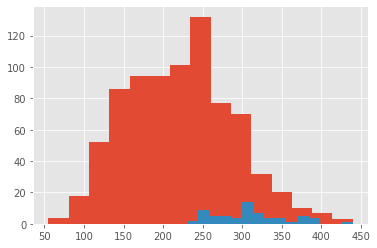

In [ ]:
plt.hist(pokemon['Sum_charac'], bins=15);
plt.hist(pok_legend['Sum_charac'], bins=15);

для произведений характеристик

In [ ]:
# средние значения произведений характеристик

print('Среднее значение произведений характеристик всех покемонов: ', pokemon['Multiply_charac'].mean())
print('Среднее значение произведений характеристик легендарных покемонов: ', pok_legend['Multiply_charac'].mean())

Среднее значение произведений характеристик всех покемонов:  478739.5325
Среднее значение произведений характеристик легендарных покемонов:  1085941.6153846155


In [ ]:
# Н0 - среднее значение выборки(легендарных покемонов) не отличается от среднего всех покемонов,
# Н1 - среднее значение выборки(легендарных покемонов) отличается от среднего всех покемонов.

stat, p = st.ttest_1samp(a=pok_legend['Multiply_charac'], popmean=pokemon['Multiply_charac'].mean())
print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу, среднее значение легендарных покемонов, вероятно, не отличается от среднего всех покемонов")
else:
    print("Отклоняем нулевую гипотезу, среднее значение легендарных покемонов, вероятно, отличается от среднего всех покемонов")

Статистика = 9.469, p = 0.000
Отклоняем нулевую гипотезу, среднее значение легендарных покемонов, вероятно, отличается от среднего всех покемонов


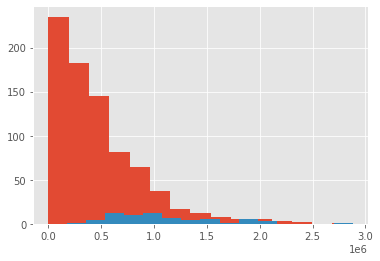

In [ ]:
plt.hist(pokemon['Multiply_charac'], bins=15);
plt.hist(pok_legend['Multiply_charac'], bins=15);

**Вывод.**

Среднее значение сумм и произведений характеристик HP,Attack,Defense у легендарных покемонов статистически отличается от значений всех покемонов. Действительно, легендарные покемоны самые лучшие в сравнении с другими покемонами.

---



<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь!
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [ ]:
# отдельные датафреймы для покемонов класса 'Rock', 'Ground', 'Steel', 'Ice'

df_Rock = pokemon[(pokemon['Class 1']== 'Rock') | (pokemon['Class 2']== 'Rock')]
print(len(df_Rock))
df_Ground = pokemon[(pokemon['Class 1']== 'Ground') | (pokemon['Class 2']== 'Ground')]
print(len(df_Ground))
df_Steel = pokemon[(pokemon['Class 1']== 'Steel') | (pokemon['Class 2']== 'Steel')]
print(len(df_Steel))
df_Ice = pokemon[(pokemon['Class 1']== 'Ice') | (pokemon['Class 2']== 'Ice')]
print(len(df_Ice))

58
67
49
38


In [ ]:
# С помощью дисперсионого анализа проверим отличается или не отличаеся сила обычной атаки
# Н0 - отличий между выборками нет, средние значения одинаковы,
# Н1 - отличия между выборками есть, одна или более выборка отличается от других

fvalue, pvalue = stats.f_oneway(df_Rock['Defense'], df_Ground['Defense'], df_Steel['Defense'], df_Ice['Defense'])

print('Статистика=%.3f, p=%.6f' % (fvalue, pvalue))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=10.820, p=0.000001
Отклоняем нулевую гипотезу, средние, вероятно, различаются


*Сила обычной атаки между покемонами класса 'Rock', 'Ground', 'Steel', 'Ice' с вероятностью 95 % отличается.*

Между какими классами есть различия, проверим с помощью теста Тьюки

In [ ]:
# преобразуем данные для дальнейшей работы

Rock = pd.melt(pd.DataFrame(list(df_Rock['Defense']), columns = ['Rock']))
Ground = pd.melt(pd.DataFrame(list(df_Ground['Defense']), columns = ['Ground']))
Steel = pd.melt(pd.DataFrame(list(df_Steel['Defense']), columns = ['Steel']))
Ice = pd.melt(pd.DataFrame(list(df_Ice['Defense']), columns = ['Ice']))

In [ ]:
df_concat = pd.concat([Rock,Ground,Steel,Ice])
df_concat.columns = ['Class', 'Defense']
df_concat

,Class,Defense
0,Rock,100
1,Rock,115
2,Rock,130
3,Rock,160
4,Rock,95
...,...,...
33,Ice,90
34,Ice,50
35,Ice,72
36,Ice,85


In [ ]:
# найдем классы, которые статистически отличаются друг от друга

tukey_pokemon = pairwise_tukeyhsd(endog=df_concat['Defense'],
                          groups=df_concat['Class'],
                          alpha=0.05)
print(tukey_pokemon)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Ground    Ice -11.0436 0.4755 -30.8783  8.7911  False
Ground   Rock  19.3847 0.0235   1.8675 36.9019   True
Ground  Steel  28.9108  0.001  10.5515   47.27   True
   Ice   Rock  30.4283  0.001  10.0443 50.8124   True
   Ice  Steel  39.9544  0.001  18.8423 61.0664   True
  Rock  Steel    9.526 0.5555  -9.4253 28.4774  False
-----------------------------------------------------


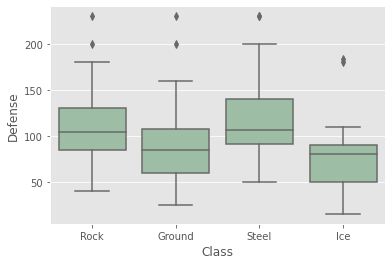

In [ ]:
ax = sns.boxplot(x='Class', y='Defense', data=df_concat, color='#99c2a2')

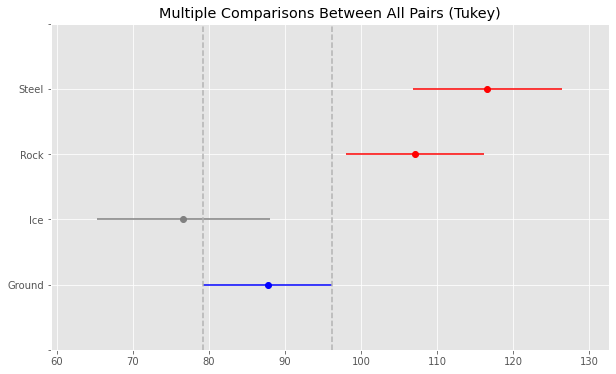

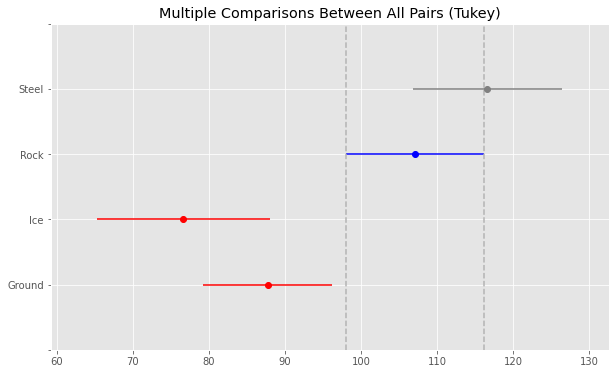

In [ ]:
tukey_pokemon.plot_simultaneous(comparison_name="Ground");
tukey_pokemon.plot_simultaneous(comparison_name="Rock");

**Вывод.**

Предположение профессора Оук, что покемоны классов Rock, Ground, Steel, Ice одинаковы по "силе обычной защиты" Defense, можно отклонить.

Дисперсионный анализ отклонил гипотезу, что выборки не отличаются.
Тест Тьюки показал, что:
- сила обычной атаки покемонов между классами Ground и Ice, Rock и Steel статистически не отличается;
- сила обычной атаки покемонов класса Ground отличается от классов  Rock и Steel, а класс Ice отличается силой атаки от классов Rock и Steel.

Можно сказать, что с вероятностью 95 % сила атаки классов Ground и Ice отличается от классов Rock и Steel.
